In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
covid_univariate_df = pd.read_csv('univariate_df.csv')

In [3]:
covid_univariate_df['Date'] = pd.to_datetime(covid_univariate_df['Date'])
covid_univariate_df = covid_univariate_df.set_index('Date')
covid_univariate_df.index = pd.to_datetime(covid_univariate_df.index)

In [4]:
covid_univariate_df

,PROVINCE_STATE_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
Date,,
2020-01-21,California,0
2020-01-22,California,0
2020-01-23,California,0
2020-01-24,California,0
2020-01-25,California,1
...,...,...
2022-04-25,Texas,1243
2022-04-26,Texas,2556
2022-04-27,Texas,2513


## 1. Temporal Visualizations:

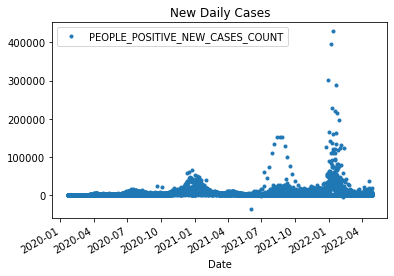

In [14]:
covid_univariate_df_no_state = covid_univariate_df.drop('PROVINCE_STATE_NAME', axis=1)

covid_univariate_df_no_state.plot(style='.',
        title='New Daily Cases')
plt.show()

<AxesSubplot:xlabel='Date'>

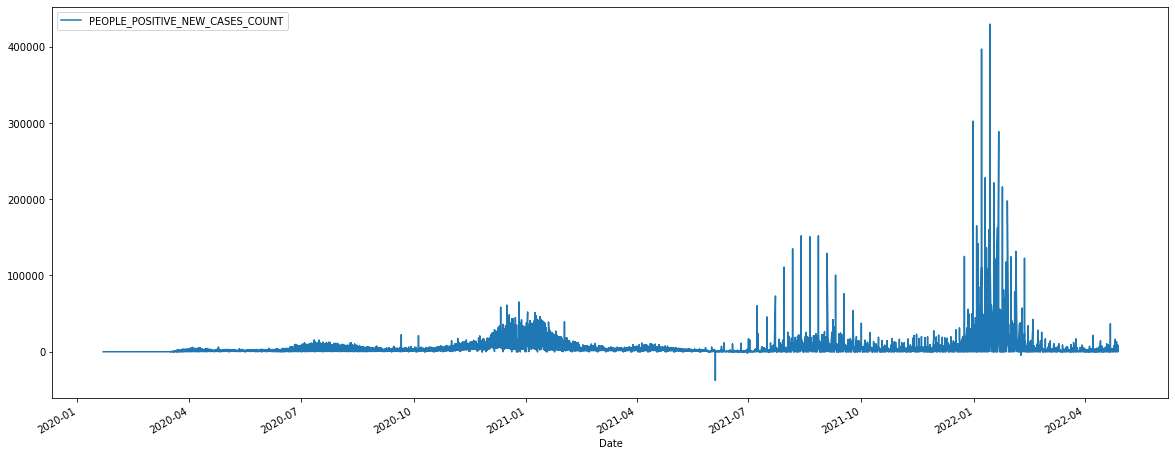

In [6]:
covid_univariate_df_no_state.loc[(covid_univariate_df_no_state.index > "2020-01-21") & (covid_univariate_df_no_state.index < "2022-04-29")].plot(figsize=(20,8))

<AxesSubplot:ylabel='Count'>

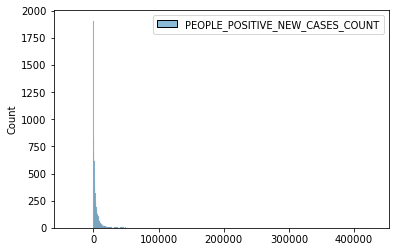

In [15]:
sns.histplot(covid_univariate_df_no_state, kde=False)

<AxesSubplot:>

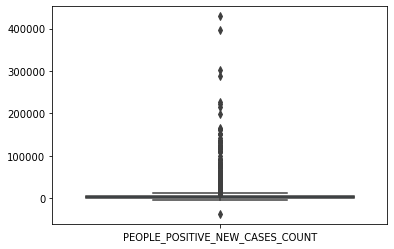

In [8]:
sns.boxplot(data=covid_univariate_df_no_state)

In [9]:
from statsmodels.tsa.stattools import adfuller
adfuller(covid_univariate_df_no_state)

(-10.301442026377215,
 3.3640247157263624e-18,
 37,
 8262,
 {'1%': -3.43114173721558,
  '5%': -2.8618898926474574,
  '10%': -2.566956243039254},
 168585.17598259094)

<AxesSubplot:ylabel='Count'>

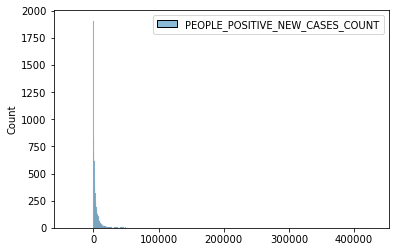

In [10]:
sns.histplot(covid_univariate_df_no_state, kde=False)

In [11]:
covid_multivariate_df = pd.read_csv('covid_multivariate_df.csv')
covid_multivariate_df['Date'] = pd.to_datetime(covid_multivariate_df['Date'])
covid_multivariate_df = covid_multivariate_df.set_index('Date')
covid_multivariate_df.index = pd.to_datetime(covid_multivariate_df.index)
covid_multivariate_df

,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Series_Complete_5Plus,Series_Complete_5to17,Series_Complete_12Plus,...,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM,GDP_current_dollar,personal_income
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,232,246,444,136,308,53.0,56.4,44.7,387976,30660
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65,105,107,41,66,46.0,45.7,46.6,141553,45270
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69,113,143,44,99,33.9,31.4,37.8,265515,40074
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360,496,849,309,540,38.0,38.0,38.1,4553170,62252
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,907,1243,2118,795,1323,40.5,39.8,41.3,7007576,45759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,96.9,47279.0,47263.0,46466.0,44091.0,15741.0,37326.0,37318.0,2490.0,36740.0,...,741,1040,1640,554,1086,44.0,42.5,45.3,3122215,48778
2022-04-29,98.6,119172.0,119158.0,117468.0,112492.0,51952.0,102515.0,102511.0,5794.0,101083.0,...,3655,4192,8316,3443,4873,53.6,51.4,55.7,10547832,110336
2022-04-29,96.9,2274.0,2274.0,2221.0,2105.0,704.0,1968.0,1968.0,136.0,1929.0,...,56,53,98,40,58,44.4,42.1,48.0,134996,45079


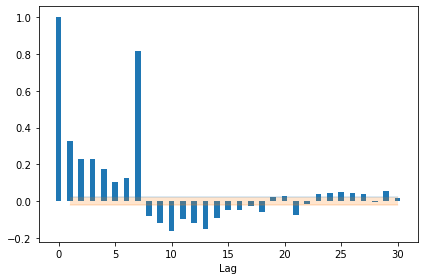

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, pacf
acf_values, confint = pacf(covid_univariate_df_no_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], alpha=0.05,nlags=30)
lags = np.arange(0, len(acf_values))

lower_bound = confint[1:, 0] - acf_values[1:]
upper_bound = confint[1:, 1] - acf_values[1:]

plt.bar(lags, acf_values, width=0.5, align='center', label='ACF')
plt.fill_between(lags[1:], lower_bound, upper_bound,  alpha=0.2, label='95% Confidence Interval')
plt.plot(lags[1:], upper_bound, lw=0.3)
plt.plot(lags[1:], lower_bound,  lw=0.3)
plt.xlabel('Lag')
plt.tight_layout()